# 3. Aprendizaje Supervisado

El aprendizaje supervisado es un enfoque en el que un modelo aprende a partir de datos etiquetados para hacer predicciones o clasificaciones. En esta sección, exploraremos la regresión, una técnica utilizada para predecir valores continuos.

## 3.1. Regresión

La regresión es una técnica estadística para modelar y analizar la relación entre una variable dependiente y una o más variables independientes. Es fundamental en el análisis predictivo.

### 3.1.1. Regresión lineal simple y múltiple

#### 3.1.1.1. Mínimos cuadrados ordinarios

**Regresión lineal simple:** La regresión lineal simple busca encontrar la línea que mejor se ajusta a un conjunto de datos. Se representa por la ecuación:

$$ y = \beta_0 + \beta_1 x $$

Donde:
-$ y $ es la variable dependiente.
-$ x $ es la variable independiente.
-$ \beta_0 $ es la intersección (ordenada al origen).
-$ \beta_1 $ es la pendiente (coeficiente de regresión).

**Regresión lineal múltiple:** Extiende la regresión lineal simple a múltiples variables independientes:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n $$

##### 3.1.1.1.1. Derivación de la fórmula de mínimos cuadrados

El método de mínimos cuadrados ordinarios (OLS) minimiza la suma de los cuadrados de los residuos (diferencias entre los valores observados y los valores predichos por el modelo).

$$ \text{Suma de cuadrados de los residuos} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

La derivación de la fórmula de OLS implica tomar las derivadas parciales de la función de costo con respecto a cada coeficiente$\beta$ y resolver el sistema de ecuaciones resultante. Las soluciones son:

$$ \beta = (X^T X)^{-1} X^T y $$

Donde:
-$ X $ es la matriz de variables independientes.
-$ y $ es el vector de la variable dependiente.

##### 3.1.1.1.2. Supuestos del modelo lineal

1. **Linealidad:** La relación entre las variables independientes y la variable dependiente es lineal.
2. **Independencia:** Las observaciones son independientes entre sí.
3. **Homoscedasticidad:** La varianza de los residuos es constante para todos los valores de las variables independientes.
4. **Normalidad:** Los residuos del modelo están normalmente distribuidos.

#### 3.1.1.2. Implementación y visualización en Python

##### 3.1.1.2.1. Uso de scikit-learn para regresión

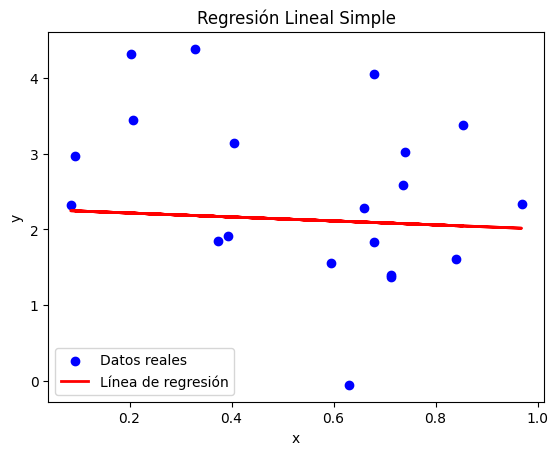

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Datos de ejemplo
data = {
    'x': np.random.rand(100),
    'y': 2.5 * np.random.rand(100) + 1.0 + np.random.normal(size=100)
}
df = pd.DataFrame(data)

# División de datos en entrenamiento y prueba
X = df[['x']]
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

# Visualización
plt.scatter(X_test, y_test, color='blue', label='Datos reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Línea de regresión')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión Lineal Simple')
plt.legend()
plt.show()

##### 3.1.1.2.2. Diagnóstico del modelo (residuos, Q-Q plots)


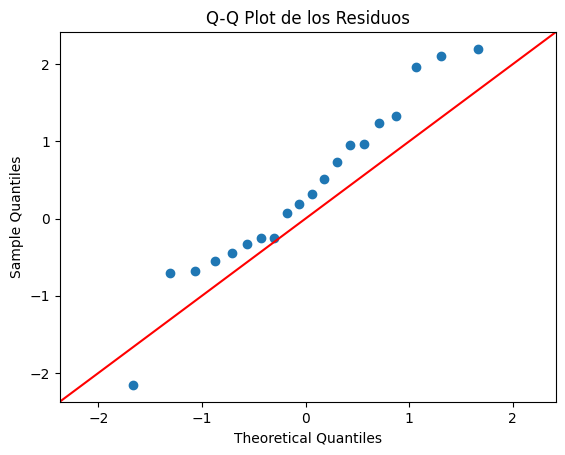

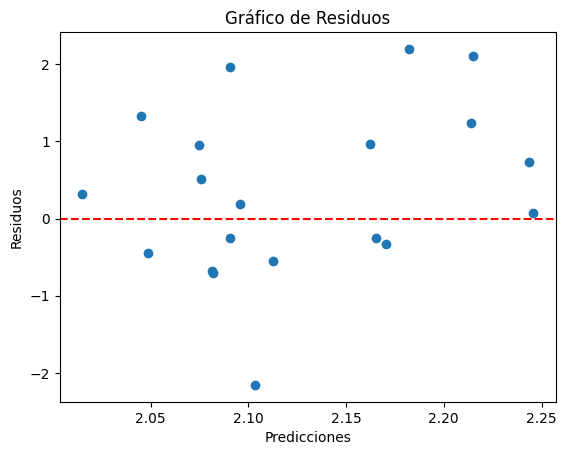

In [9]:
import statsmodels.api as sm

# Residuos
residuos = y_test - y_pred

# Q-Q plot
sm.qqplot(residuos, line='45')
plt.title('Q-Q Plot de los Residuos')
plt.show()

# Gráfico de residuos
plt.scatter(y_pred, residuos)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de Residuos')
plt.show()




### 3.1.2. Regresión polinomial y regularización

#### 3.1.2.1. Ridge y Lasso

**Regresión polinomial:** Extiende la regresión lineal a relaciones no lineales convirtiendo las características en polinomios de grado$n$.

**Regularización:** Ayuda a prevenir el sobreajuste penalizando los coeficientes del modelo. Las técnicas más comunes son Ridge (L2) y Lasso (L1).

##### 3.1.2.1.1. Diferencias entre L1 y L2 regularización

- **L1 (Lasso):** Penaliza la suma de los valores absolutos de los coeficientes.

  $$ Lasso: \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} |\beta_j| $$

- **L2 (Ridge):** Penaliza la suma de los cuadrados de los coeficientes.

  $$ Ridge: \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \lambda \sum_{j=1}^{p} \beta_j^2 $$

##### 3.1.2.1.2. Selección del parámetro de regularización

El parámetro de regularización (\(\lambda$) controla la fuerza de la penalización. Puede seleccionarse mediante validación cruzada.

#### 3.1.2.2. Validación cruzada para selección de modelos

##### 3.1.2.2.1. K-fold cross-validation

La validación cruzada K-fold divide los datos en$K$ partes iguales, entrenando el modelo$K$ veces, cada vez usando una parte diferente como conjunto de prueba y las otras$K-1$ partes como conjunto de entrenamiento.

##### 3.1.2.2.2. Implementación de validación cruzada en Python

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso

# Validación cruzada para Ridge
ridge_model = Ridge(alpha=1.0)
scores = cross_val_score(ridge_model, X, y, cv=5)
print(f'Cross-Validation Scores (Ridge): {scores}')
print(f'Mean CV Score (Ridge): {np.mean(scores)}')

# Validación cruzada para Lasso
lasso_model = Lasso(alpha=0.1)
scores = cross_val_score(lasso_model, X, y, cv=5)
print(f'Cross-Validation Scores (Lasso): {scores}')
print(f'Mean CV Score (Lasso): {np.mean(scores)}')

Cross-Validation Scores (Ridge): [-0.01527735  0.00536048 -0.13122857 -0.14585757  0.00293636]
Mean CV Score (Ridge): -0.056813327632798824
Cross-Validation Scores (Lasso): [-0.00267604 -0.01848623 -0.12469943 -0.16816747 -0.00104111]
Mean CV Score (Lasso): -0.06301405771848252


la regresión en el contexto del aprendizaje supervisado ofrece potentes herramientas para predecir valores continuos. Desde la regresión lineal simple y múltiple hasta las técnicas de regularización y validación cruzada, estos métodos permiten construir modelos robustos y generalizables para el análisis predictivo.